In [3]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', rc = {'figure.figsize': (20, 8 )})



In [4]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/432724/HH_data.csv', sep=';')

In [5]:
df.columns

Index(['archived', 'area_name', 'direction', 'employer_name', 'level', 'name',
       'published_at', 'query_string', 'salary_currency', 'type', 'url',
       'vacancy_id', 'address_lat', 'address_lng', 'employer_id',
       'salary, net', 'salary_from', 'salary_gross', 'salary_to'],
      dtype='object')

In [6]:
df.isna().sum()

archived               0
area_name              0
direction              0
employer_name          0
level                  0
name                   0
published_at           0
query_string           0
salary_currency    20034
type                   0
url                    0
vacancy_id             0
address_lat        13160
address_lng        13160
employer_id            0
salary, net        19728
salary_from        20474
salary_gross       19728
salary_to          21668
dtype: int64

In [7]:
df = df.rename(columns= {'salary, net' : 'salary_net'})

In [8]:
df.head()

,archived,area_name,direction,employer_name,level,name,published_at,query_string,salary_currency,type,url,vacancy_id,address_lat,address_lng,employer_id,salary_net,salary_from,salary_gross,salary_to
0,В архиве,Москва,Analytics,GfK Rus,—,Аналитик отдела методологии,01.07.2020 18:01:54,"""Python"" AND ""data"" AND ""анализ""",NaN,Навык,https://api.hh.ru/vacancies/24312953?host=hh.ru,24312953,NaN,NaN,1825,NaN,NaN,NaN,NaN
1,В архиве,Москва,BI,"РОСБАНК, Societe Generale Group (Russia)",—,IT auditor,03.07.2020 8:56:27,"""Визуализация данных"" OR ""Data visualization""",NaN,Навык,https://api.hh.ru/vacancies/28099593?host=hh.ru,28099593,"55,772168","37,648456",599,NaN,NaN,NaN,NaN
2,В архиве,Владивосток,Analytics,Сеть магазинов цифровой и бытовой техники DNS,Линейный специалист,Менеджер ИТ-проектов,17.07.2020 12:16:01,"""Бизнес аналитик"" OR ""Business Analyst""",RUR,Профессия,https://api.hh.ru/vacancies/28407762?host=hh.ru,28407762,"43,180305","131,916845",1025275,55000,40000.0,0.0,70000.0
3,В архиве,Краснодар,Data Engineering,"МАГНИТ, Розничная сеть",—,Тестировщик ПО,29.06.2020 13:21:21,"""Etl""",NaN,Навык,https://api.hh.ru/vacancies/28711707?host=hh.ru,28711707,0,0,49357,NaN,NaN,NaN,NaN
4,В архиве,Новосибирск,Data Engineering,R-Style Softlab (Эр-Стайл Софтлаб),—,Ведущий разработчик DWH Департамента аналитиче...,24.07.2020 21:30:57,"""Etl""",NaN,Навык,https://api.hh.ru/vacancies/28813213?host=hh.ru,28813213,"55,016265","82,920007",2419,NaN,NaN,NaN,NaN


In [9]:
df.query_string.unique()

array(['"Python" AND "data" AND "анализ"',
       '"Визуализация данных" OR "Data visualization"',
       '"Бизнес аналитик" OR "Business Analyst"', '"Etl"',
       '"Аналитик данных" OR "Data analyst"',
       '"Продуктовый аналитик" OR "Product Analyst"',
       '"Инженер баз данных" OR "DWH Engineer" OR "Инженер данных" OR "Data Engineer"',
       '"Tableau"', '"Spark"', '"Дашборд"', '"Аналитик баз данных"',
       '"Power BI"', '"Разработчик BI" OR "BI Developer"',
       '"Data scientist" OR "Machine Learning specialist"', '"Cognos"',
       '"Qlik" OR "Qlikview" OR "Qliksense"',
       '"Руководитель data science"', '"Аналитик BI" OR "BI Analyst"',
       '"Pandas"', '"Plotly"', '"Matplotlib"', '"Redash"',
       '"Руководитель направления предиктивной аналитики"',
       '"Marketing Analyst" OR "Маркетинговый аналитик"',
       '"Младший аналитик" OR "Junior Data Analyst"', '"NumPy"',
       '"Airflow"', '"d3.js"',
       '"Руководитель отдела аналитики" OR "Head of analytics" O

In [10]:
df.salary_net = df.salary_net.str.replace(',', '.')

In [11]:
df[df.query_string == '"Tableau"'].salary_net.dropna()

630      180000
896       49764
6575      40000
6707      50000
6708      50000
          ...  
13315     85000
13316    162500
13317    162500
13318    162500
13319    162500
Name: salary_net, Length: 115, dtype: object

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


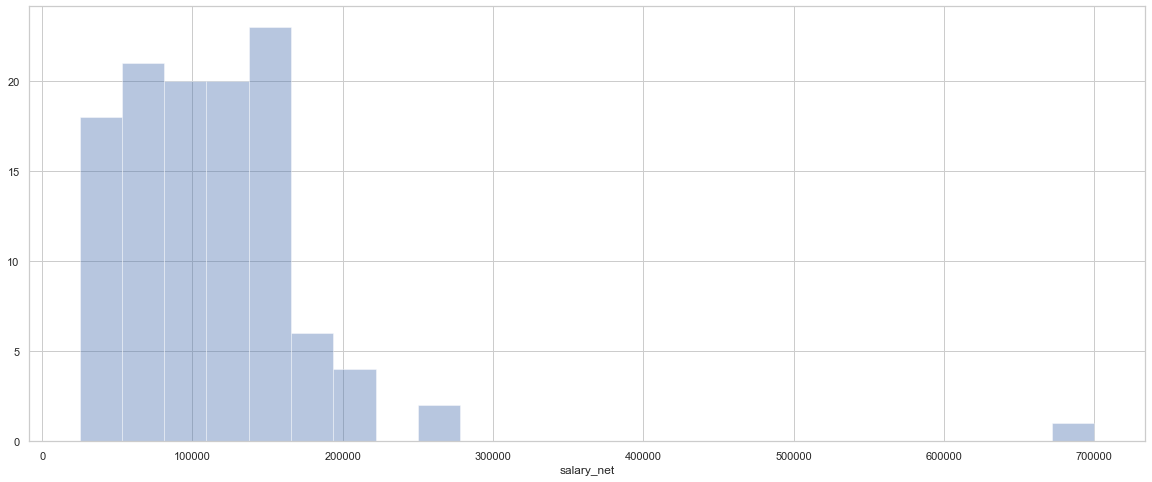

In [12]:
sns.distplot(df[df.query_string == '"Tableau"'].salary_net.dropna(), kde=False);

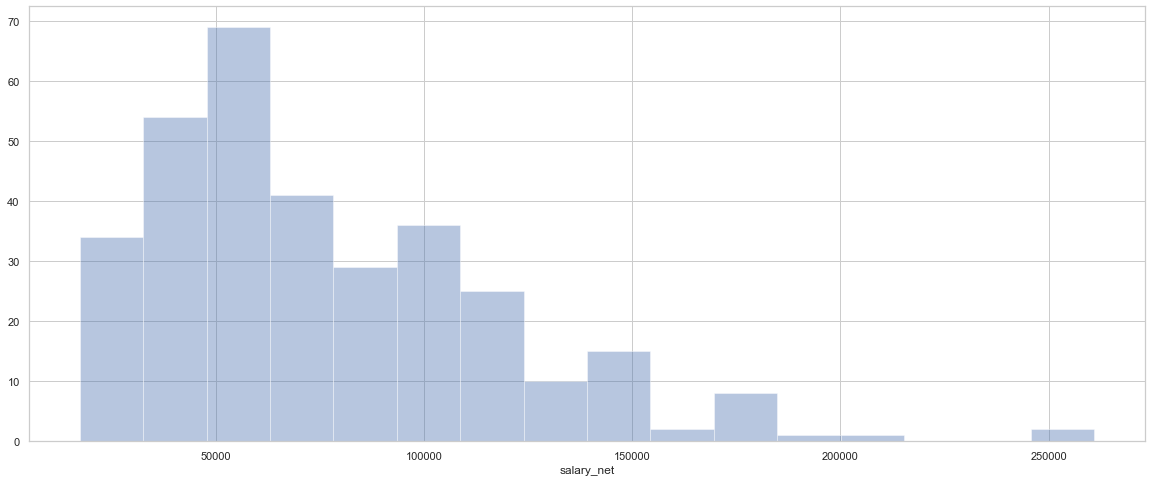

In [13]:
sns.distplot(df[df.query_string == '"Power BI"'].salary_net.dropna(), kde=False);

In [14]:
df.published_at = pd.to_datetime(df.published_at)

In [15]:
df.published_at.dtypes

dtype('<M8[ns]')

<AxesSubplot:xlabel='published_at'>

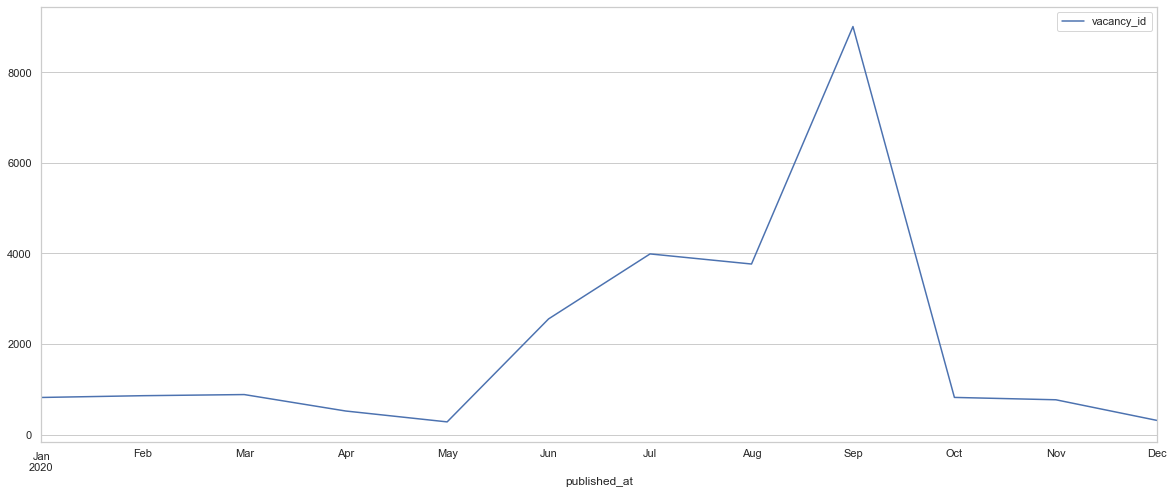

In [16]:
df.set_index('published_at').resample('M').agg({'vacancy_id':'count'}).plot()

In [17]:
df.published_at

0       2020-01-07 18:01:54
1       2020-03-07 08:56:27
2       2020-07-17 12:16:01
3       2020-06-29 13:21:21
4       2020-07-24 21:30:57
                ...        
24575   2020-08-09 13:32:57
24576   2020-07-22 13:19:14
24577   2020-11-08 11:45:18
24578   2020-09-18 19:04:03
24579   2020-09-18 21:20:39
Name: published_at, Length: 24580, dtype: datetime64[ns]

In [18]:
df.set_index('published_at').resample('M').vacancy_id.count()

published_at
2020-01-31     820
2020-02-29     859
2020-03-31     884
2020-04-30     521
2020-05-31     281
2020-06-30    2554
2020-07-31    3988
2020-08-31    3765
2020-09-30    9006
2020-10-31     821
2020-11-30     769
2020-12-31     312
Freq: M, Name: vacancy_id, dtype: int64

In [19]:
2554 + 3988 + 3765

10307

In [20]:
9006 + 821 + 769

10596

In [21]:
--------------------------------

SyntaxError: invalid syntax (<ipython-input-21-0df4cfbc1167>, line 1)

In [ ]:
df.set_index('published_at').resample('D').vacancy_id.count()

In [ ]:
df.set_index('published_at').resample('D').agg({'vacancy_id':'count'}).plot()

In [ ]:
df.query('published_at > "2020-01-07" &  published_at < "2020-01-15"').vacancy_id.count()

In [ ]:
df['week_of_day'] = df.published_at.dt.dayofweek

In [ ]:
df.drop(columns=['week', 'weel'])

In [ ]:
df.groupby('week_of_day').agg({'vacancy_id' : 'count'}).plot()

In [ ]:
df.groupby('type').vacancy_id.count()